<a href="https://colab.research.google.com/github/AkshatMadhani/N-L-P/blob/main/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:

message=pd.read_csv("spam.csv")
message

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
stemmer=PorterStemmer()
corpus=[]

In [5]:
for i in range (len (message)):
  review=re.sub("[^a-z A-Z ]"," ",message['Message'][i])
  review=review.lower()

  review=review.split()
  review=[ stemmer.stem(word)for word in review if word not in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
x=cv.fit_transform(corpus).toarray()
y=pd.get_dummies(message['Category'])
y=y.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.naive_bayes import MultinomialNB
mv=MultinomialNB()
mv.fit(x_train,y_train)


MultinomialNB()

In [9]:
y_pred=mv.predict(x_test)
y_pred

array([False,  True, False, ..., False, False, False])

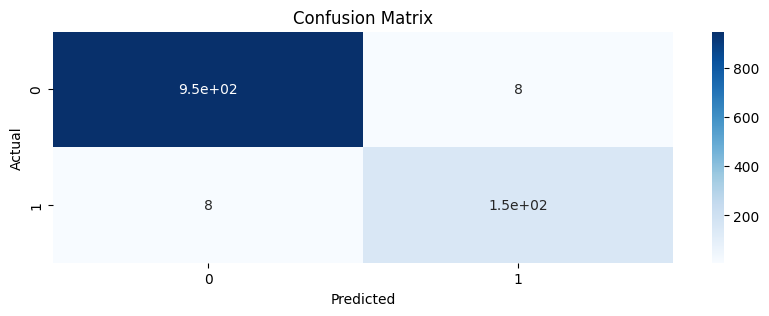

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cv=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,3))
sns.heatmap(cv,annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

       False       0.99      0.99      0.99       955
        True       0.95      0.95      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

